## Sentimental Analysis of Imdb data

We'll be working with "IMDB dataset", a set of 50,000  reviews. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [2]:
# Importing libraries
import numpy as np 
import pandas as pd 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\NEHA\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Importing Dataset
f = np.load('imdb.npz')
x_train, labels_train = f['x_train'], f['y_train']
x_test, labels_test = f['x_test'], f['y_test']
num_words=10000
seed = 113
start_char=1
oov_char=2
index_from=3
skip_top=0
maxlen=None

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. 

The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [17]:
# Converting words into indices
np.random.seed(seed)
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
labels_train = labels_train[indices]

indices = np.arange(len(x_test))
np.random.shuffle(indices)
x_test = x_test[indices]
labels_test = labels_test[indices]

xs = np.concatenate([x_train, x_test])
labels = np.concatenate([labels_train, labels_test])

if start_char is not None:
        xs = [[start_char] + [w + index_from for w in x] for x in xs]
elif index_from:
        xs = [[w + index_from for w in x] for x in xs]

if maxlen:
        xs, labels = _remove_long_seq(maxlen, xs, labels)
        if not xs:
            raise ValueError('After filtering for sequences shorter than maxlen=' +
                             str(maxlen) + ', no sequence was kept. '
                             'Increase maxlen.')
if not num_words:
        num_words = max([max(x) for x in xs])

    # by convention, use 2 as OOV word
    # reserve 'index_from' (=3 by default) characters:
    # 0 (padding), 1 (start), 2 (OOV)
if oov_char is not None:
        xs = [[w if (skip_top <= w < num_words) else oov_char for w in x] for x in xs]
else:
        xs = [[w for w in x if (skip_top <= w < num_words)] for x in xs]

idx = len(x_train)
x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])

In [18]:
# Splitting data into test and train datasets
(train_data, train_labels), (test_data, test_labels) = (x_train, y_train), (x_test, y_test)

In [21]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [22]:
train_labels[0]

1

## Decoding review back to english words

In [43]:
#NOTE: not working in kaggle dataset
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [24]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [25]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
# vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building network

In [28]:
from keras import models
from keras import layers

The input data is simply vectors, and labels are scalars (1s and 0s). A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations: Dense(16, activation='relu')

In [29]:
#Defining the network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
# We configure our model with the rmsprop optimizer and the binary_crossentropy loss function
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validation

In [33]:
#In order to monitor during training the accuracy of the model on data , we will create a "validation set" by setting apart 10,000 samples from the original training data:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
# Fitting the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 787us/step - loss: 0.5085 - binary_accuracy: 0.7815 - val_loss: 0.3797 - val_binary_accuracy: 0.8688
Epoch 2/20
15000/15000 [==============================] - 9s 591us/step - loss: 0.3006 - binary_accuracy: 0.9045 - val_loss: 0.3003 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.2180 - binary_accuracy: 0.9287 - val_loss: 0.3084 - val_binary_accuracy: 0.8714
Epoch 4/20
15000/15000 [==============================] - 9s 576us/step - loss: 0.1751 - binary_accuracy: 0.9436 - val_loss: 0.2839 - val_binary_accuracy: 0.8833
Epoch 5/20
15000/15000 [==============================] - 9s 583us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2847 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 9s 582us/step - loss: 0.1150 - binary_accuracy: 0.9651 - val_loss: 0.3151 - val_b

In [35]:
# The call to model.fit() returns a History object. This object has a member history, 
#which is a dictionary containing data about everything that happened during training.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

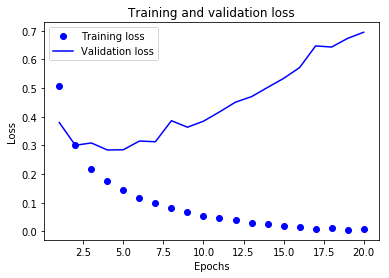

In [38]:
#Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:
import matplotlib.pyplot as plt

#acc = history.history['acc']
#val_acc = history.history['val_acc']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

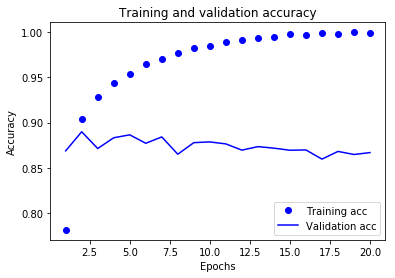

In [37]:
plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy.The training loss decreases with every epoch and the training accuracy increases with every epoch.For the validation loss and accuracy: they seem to peak at the fourth epoch. 

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 13s 503us/step - loss: 0.4742 - acc: 0.8213
Epoch 2/4
25000/25000 [==============================] - 5s 219us/step - loss: 0.2643 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 5s 186us/step - loss: 0.1985 - acc: 0.9306
Epoch 4/4
25000/25000 [==============================] - 13s 504us/step


In [40]:
results

[0.32154800709724424, 0.8738]

The approach achieves an accuracy of approximately 88 %

In [41]:
model.predict(x_test)

array([[0.13513733],
       [0.9997013 ],
       [0.29558492],
       ...,
       [0.07436249],
       [0.04522954],
       [0.474234  ]], dtype=float32)

The network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

The text in the document by Neha Gaikwad and Nupur Deshpande is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/
The code in the document by Neha Gaikwad and Nupur Deshpande is licensed under the MIT License https://opensource.org/licenses/MIT